<a href="https://colab.research.google.com/github/olfabre/DataMaining_Master_2/blob/main/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1-01 - **chargement** du fichier fruit_data_with_colors.txt avec Panda

In [4]:
from google.colab import files
uploaded = files.upload()

Saving fruit_data_with_colors.txt to fruit_data_with_colors.txt


# Q1-02 - lecture Panda, afficher toutes les lignes

In [6]:
import pandas as pd

# Lire le fichier
fruits = pd.read_table('fruit_data_with_colors.txt')

# Afficher toutes les lignes
pd.set_option('display.max_rows', None)
print(fruits)

    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

# Q1-03 - combien d'attributs ?

In [7]:
print("Nombre d'attributs :", fruits.shape[1])

Nombre d'attributs : 7


Q1-04 - Quels sont les attributs ?

In [8]:
print("Noms des attributs :")
print(fruits.columns.tolist())

Noms des attributs :
['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height', 'color_score']


Q1-05 - ques sont leurs types ?

In [9]:
print("Types des attributs :")
print(fruits.dtypes)

Types des attributs :
fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object


Q1-06 - Quel est le nombre d'instances ?

In [10]:
print("Nombre d'instances :", fruits.shape[0])

Nombre d'instances : 59


Q1-07 - répartition des instances par classe

In [11]:
print("Répartition des classes :")
print(fruits['fruit_name'].value_counts())

Répartition des classes :
fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64


## **Q2**

Q2 - 1 diagramme de dispersion (scatter matrix) entre les variables

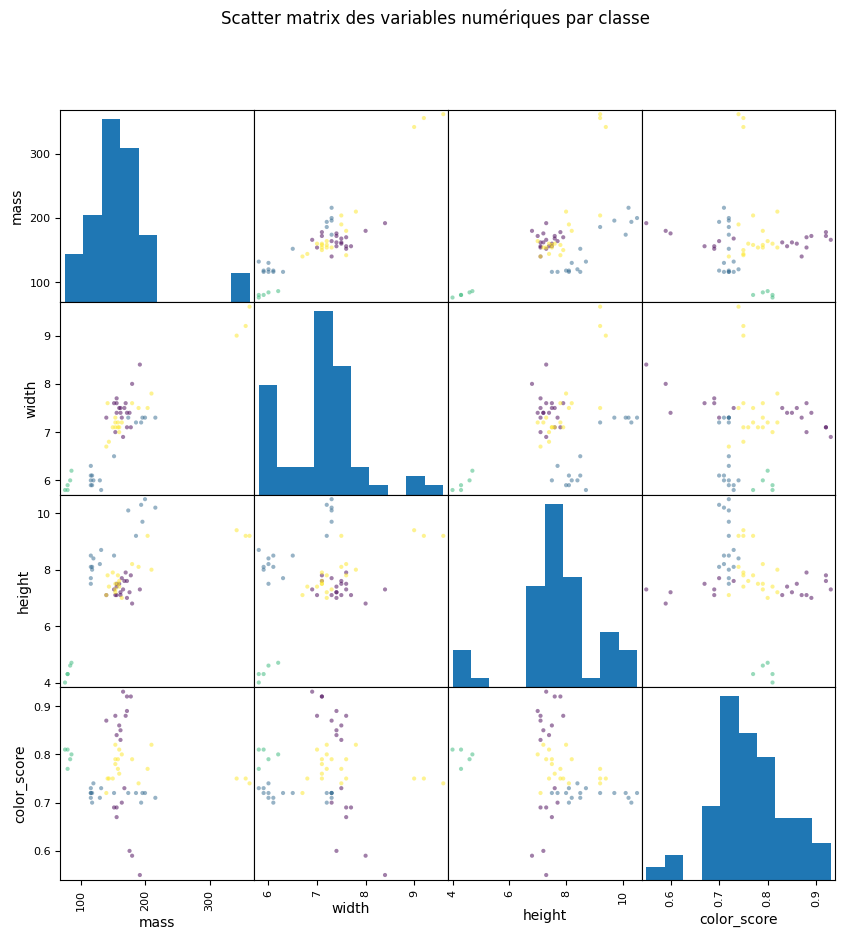

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# on prepare les données
# lecture fichier
fruits = pd.read_table('fruit_data_with_colors.txt')

# Variables numériques
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_name']

# on créer le graphique Scatter matrix (diagramme de dispersion)
# Couleurs automatiques selon la classe
scatter_matrix(X, c=y.astype('category').cat.codes, figsize=(10, 10), diagonal='hist')
plt.suptitle('Scatter matrix des variables numériques par classe')
plt.savefig('scatter_matrix_fruits.png', dpi=150)
plt.show()

on va fixer les couleurs
- **Citron** = jaune
- **Pomme** = vert
- **Orange** = orange
- **Mandarine** = rouge



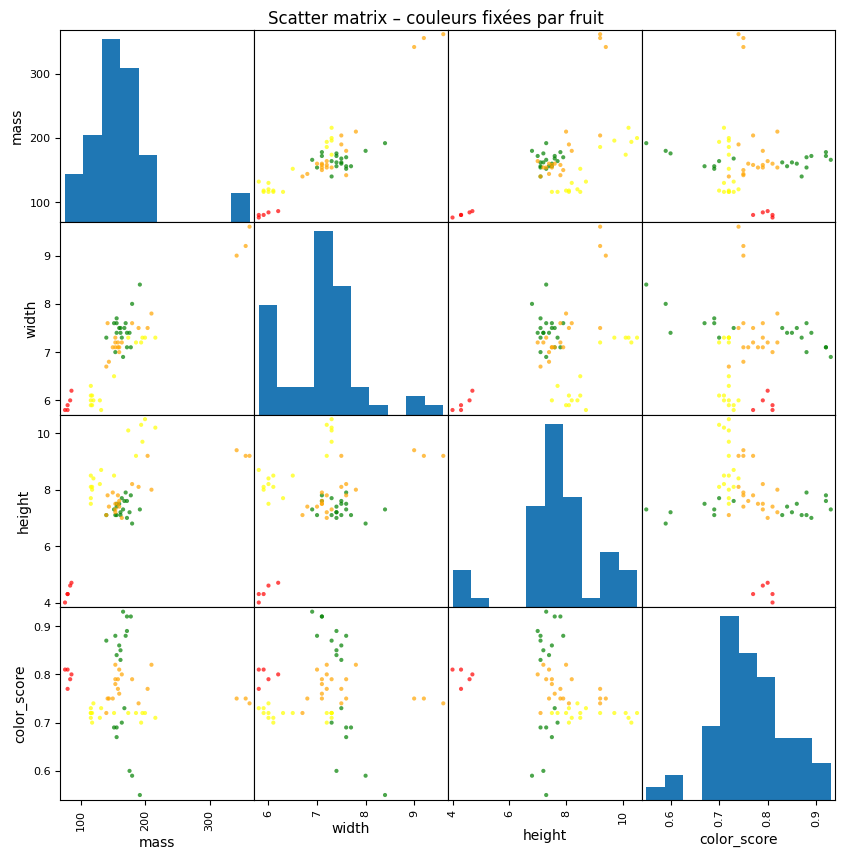

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# on prepare les données
# lecture fichier
fruits = pd.read_table('fruit_data_with_colors.txt')

# --- 1. Mapping explicite fruit → couleur ---
color_map = {
    'lemon'    : 'yellow',   # citron
    'apple'    : 'green',    # pomme
    'orange'   : 'orange',   # orange
    'mandarin' : 'red'       # mandarine
}

# Variables numériques
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
# --- 2. Créer une liste de couleurs dans le même ordre que le DataFrame ---
colors = fruits['fruit_name'].map(color_map)

# --- 3. Dessiner la matrice en passant la liste de couleurs ---
scatter_matrix(fruits[['mass', 'width', 'height', 'color_score']],
               c=colors,           # ici on impose les couleurs
               figsize=(10, 10),
               alpha=0.7,
               diagonal='hist')

plt.suptitle('Scatter matrix – couleurs fixées par fruit', y=0.9)
plt.show()